In [1]:
%%capture
!pip install pdfplumber
!pip install unicodedata

In [2]:
import pdfplumber
import re
import unicodedata
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Extracción del texto
Para convertir el pdf a CSV, debemos extraer el texto que contiene el texto de cada pagina, esto lo hacemos con ayuda de la libreria *_pdfplumber_* al iterar sobre sus páginas y extraer el texto para posteriormente guardarlo como una cadena continua.

In [3]:
#extraer texto de un archivo pdf
def extraer_texto_de_pdf(ruta_pdf):
    texto = ""
    with pdfplumber.open(ruta_pdf) as pdf:
        for pagina in pdf.pages:
            texto += pagina.extract_text()
    return texto


Una vez extraído el texto, se debe de limpiar de tal forma que la cadena texto:
- Se conviertan las mayúsculas a minúsculas.
- Se eliminen los acentos.
- Se eliminen los espacios en blanco de más.
- Se eliminen los signos de puntuación.
- Se eliminen los números.

In [4]:
#limpiar texto
def limpiar_texto(texto):
    texto = texto.lower() #convertir mayusculas a minisculas
    texto = unicodedata.normalize('NFKD', texto).encode('ascii', 'ignore').decode('utf-8', 'ignore') #quitar acentos
    texto = re.sub(r'\s+', ' ', texto).strip() #quitar espacios en blanco de más
    texto = re.sub(r'[^\w\s]', '', texto) #eliminar sinos de puntuacion
    texto = re.sub(r'\d+', '', texto) #eliminar numeros
    return texto

Posteriormente, se va a crear un vocabulario que, en base a nuestra función, será una subclase de un diccionario llamada _*Counter*_ a la cual se puede acceder como un diccionario donde la principal diferencia es que el _*Counter*_ está especialmente diseñado para contar elementos de un iterable.

In [5]:
#vocabulario
def crear_vocabulario(texto):
    palabras = texto.split()
    vocabulario = Counter(palabras)
    return vocabulario

In [6]:
#vocabulario en csv
def guardar_vocabulario_csv(vocabulario, ruta_archivo):
    df = pd.DataFrame(list(vocabulario.items()), columns=['palabra', 'frecuencia'])
    df.to_csv(ruta_archivo, index=False, encoding='utf-8')

Después, con pandas se guarda como un _dataframe_ donde se tiene en una columna las palabras y en otra la frecuencia con la que aparecen y finalmente se exporta el _dataframe_ a _parquet_.

In [7]:
#guardar el vocabulario en un parquet
def guardar_vocabulario_parquet(vocabulario, ruta_archivo):
    df = pd.DataFrame(list(vocabulario.items()), columns=['palabra', 'frecuencia'])
    df.to_parquet(ruta_archivo, engine='pyarrow')

Ejecutamos las funciones declaradas anteriormente.

In [8]:
texto = extraer_texto_de_pdf('Los-miserables.pdf')

#limpiar el texto
texto_limpio = limpiar_texto(texto)

#crear el vocabulario del texto limpio
vocabulario = crear_vocabulario(texto_limpio)

#guardar vocabulario en csv
guardar_vocabulario_csv(vocabulario, 'vocabulario.csv')

#guardar el vocabulario en parquet
guardar_vocabulario_parquet(vocabulario, 'vocabulario.parquet')

Imprimimos el total de palabras del pdf sumando todas las palabras y tambien contamos las palabras únicas en el texto.

In [9]:
total_palabras = sum(vocabulario.values())
print(f"Palabras totales en el texto: {total_palabras}")

palabras_unicas = len(vocabulario)
print(f"Palabras diferentes en el vocabulario: {palabras_unicas}")

Palabras totales en el texto: 109281
Palabras diferentes en el vocabulario: 13114


Finalmente, imprimimos las cien palabras más comunes y las cien menos comunes.

In [10]:
palabras_mas_comunes = vocabulario.most_common(100)
print("100 palabras más comunes:")
for palabra, frecuencia in palabras_mas_comunes:
    print(f"{palabra}: {frecuencia}")

100 palabras más comunes:
de: 5325
la: 3918
que: 3818
el: 3394
y: 3123
en: 2836
a: 2489
se: 1681
un: 1601
no: 1499
los: 1353
una: 1319
su: 1245
por: 936
las: 935
con: 924
habia: 858
del: 813
al: 756
es: 749
lo: 719
le: 667
era: 650
como: 572
mas: 513
para: 504
senor: 447
esta: 414
pero: 372
hombre: 363
si: 358
sus: 344
todo: 327
me: 326
sin: 311
obispo: 286
dijo: 281
cuando: 274
estaba: 273
sobre: 269
dos: 264
este: 261
aquel: 253
mi: 244
ya: 229
hacia: 219
yo: 218
esto: 218
madeleine: 214
tenia: 212
jean: 200
ha: 199
fantine: 194
valjean: 192
aquella: 190
hay: 186
he: 182
ser: 181
muy: 178
javert: 175
nada: 174
mismo: 173
o: 165
os: 163
poco: 158
tan: 158
bien: 157
ni: 156
ella: 155
quien: 151
alcalde: 149
vez: 148
despues: 146
fue: 145
todos: 141
puerta: 139
anos: 136
hubiera: 133
cual: 133
donde: 131
dios: 130
mujer: 128
momento: 125
tiempo: 124
sido: 124
casa: 123
son: 121
aqui: 120
noche: 119
hecho: 118
tres: 115
dia: 114
luego: 113
cabeza: 113
decir: 112
voz: 111
alli: 107
ojos: 

In [11]:
palabras_menos_comunes = vocabulario.most_common()[:-101:-1]
print("100 palabras menos comunes:")
for palabra, frecuencia in palabras_menos_comunes:
    print(f"{palabra}: {frecuencia}")

100 palabras menos comunes:
promiscuidad: 1
sufrio: 1
encontrados: 1
cementerio: 1
gratuito: 1
enterrada: 1
estricto: 1
simplifico: 1
reservar: 1
posiblemente: 1
devuelta: 1
alejaba: 1
brumas: 1
marchando: 1
bujia: 1
singularidad: 1
reparo: 1
valga: 1
holocausto: 1
seguidas: 1
mintio: 1
evadido: 1
insista: 1
desfallecer: 1
aventurar: 1
quedarse: 1
retirarse: 1
amuralladas: 1
correcto: 1
objecion: 1
integramente: 1
respirable: 1
ambiente: 1
protestas: 1
murmullos: 1
alboroto: 1
turbaria: 1
persiguiendome: 1
inarticulados: 1
sonidos: 1
servira: 1
leerlo: 1
doblar: 1
obligan: 1
entranas: 1
integros: 1
violencias: 1
enrojecidos: 1
pesquisas: 1
encontradas: 1
migas: 1
comprobado: 1
mordiendo: 1
embalaba: 1
envolvio: 1
obtuvo: 1
penultima: 1
huella: 1
deshecha: 1
peldanos: 1
conducian: 1
registrado: 1
lateral: 1
maestra: 1
guardaria: 1
barrote: 1
embargada: 1
retenido: 1
boquiabierta: 1
candela: 1
ensimismamiento: 1
inconscientemente: 1
esperara: 1
colgo: 1
velaban: 1
puestos: 1
reflexionand

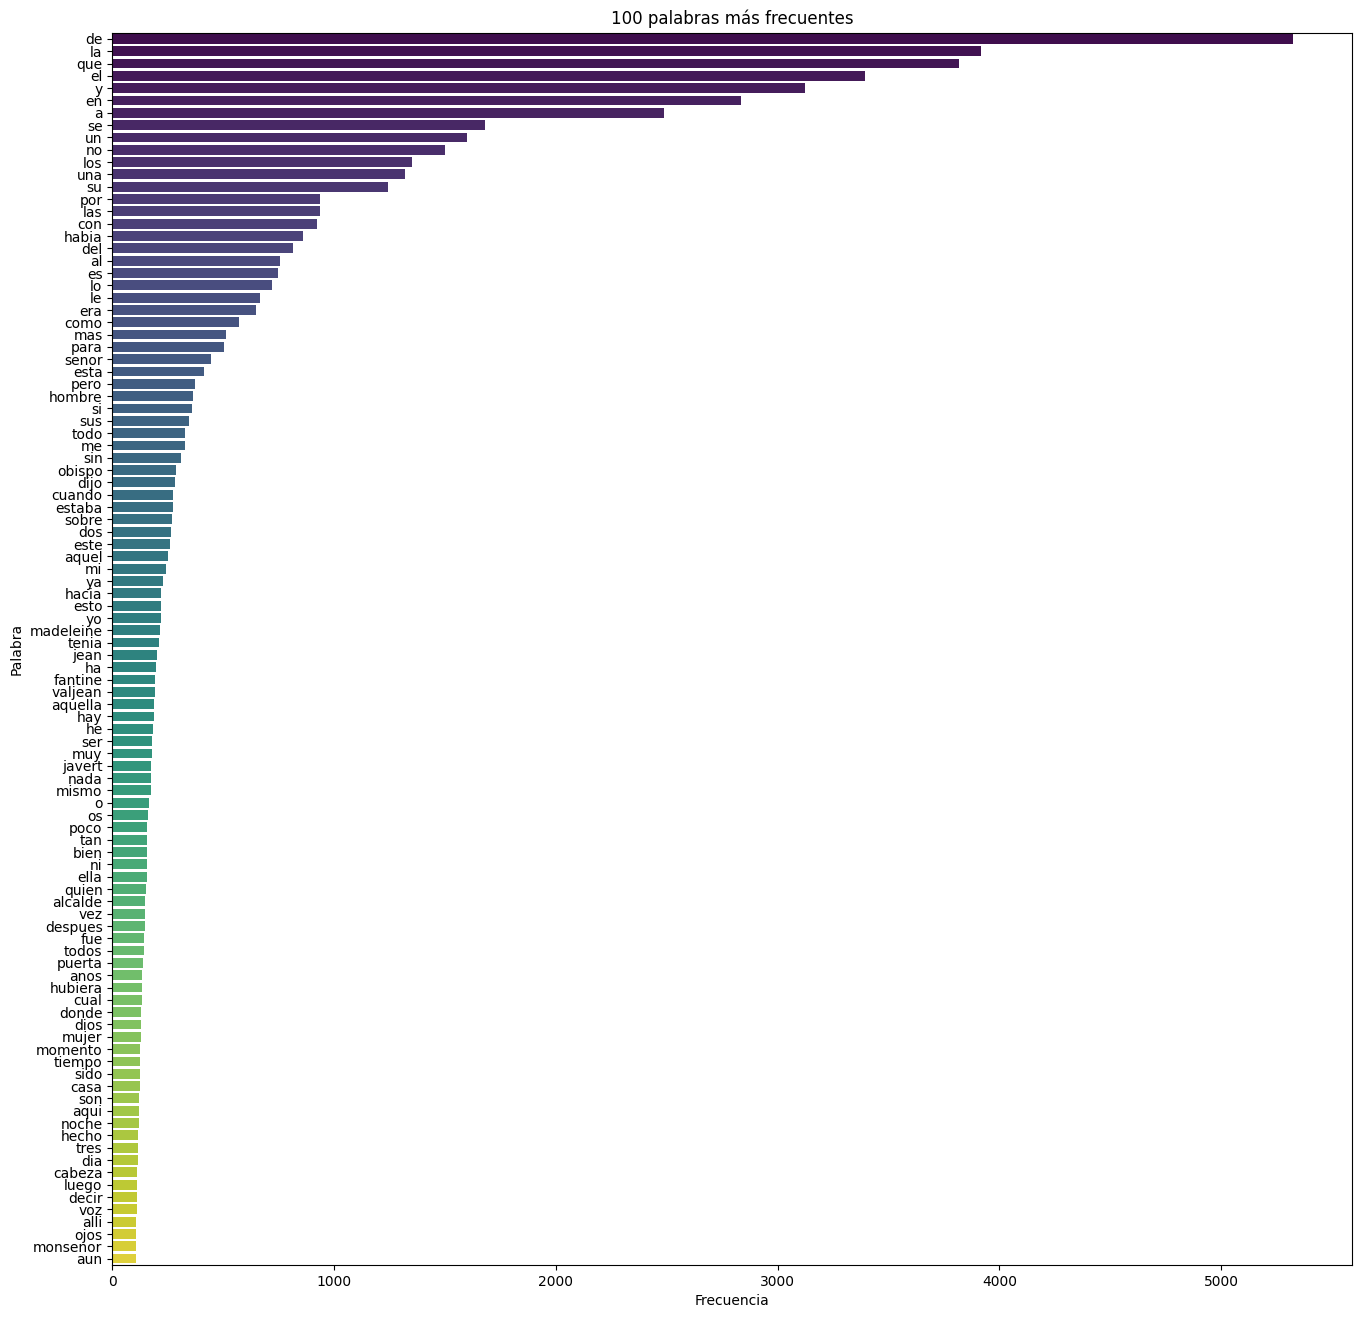

In [12]:
df = pd.DataFrame(list(vocabulario.items()), columns=['palabra', 'frecuencia'])

# Ordenar por frecuencia
df = df.sort_values(by='frecuencia', ascending=False)

# Gráfico de las 100 palabras más frecuentes
plt.figure(figsize=(16, 16))
sns.barplot(x='frecuencia', y='palabra', data=df.head(100), hue='palabra', palette='viridis', legend=False)
plt.title('100 palabras más frecuentes')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.show()

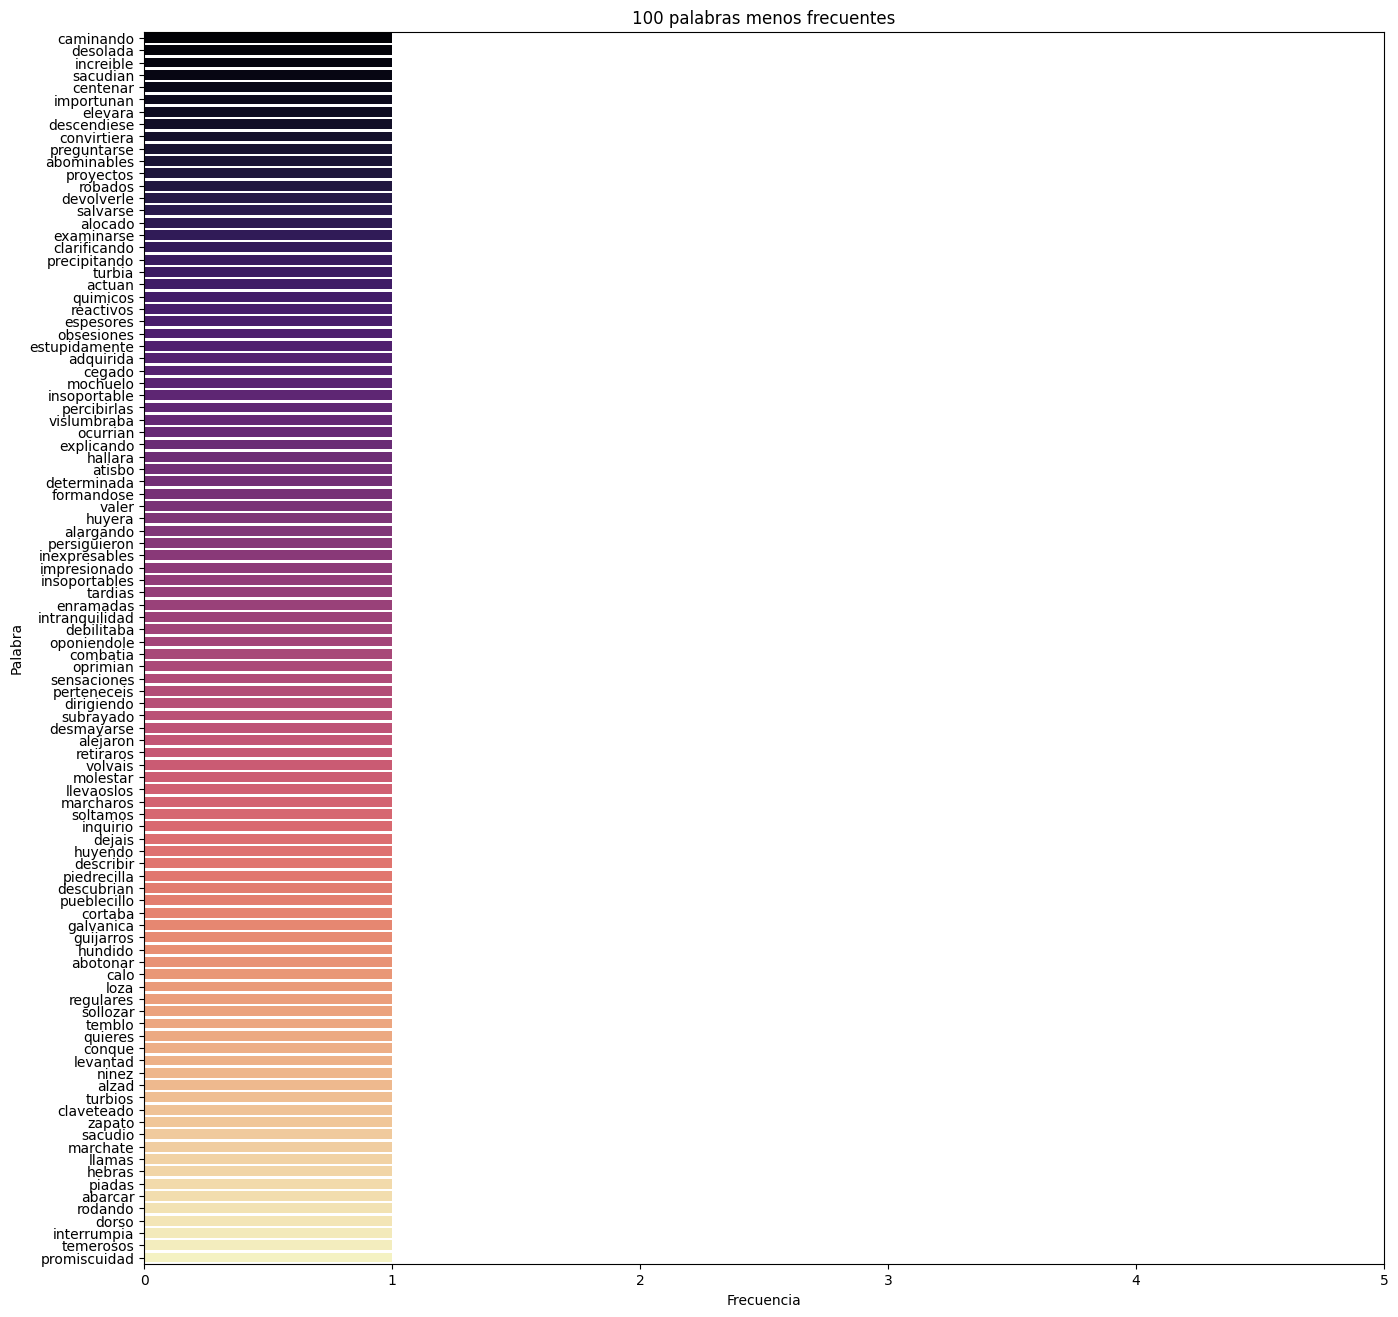

In [13]:
# Gráfico de las 100 palabras menos frecuentes
plt.figure(figsize=(16, 16))
sns.barplot(x='frecuencia', y='palabra', data=df.tail(100), hue='palabra', palette='magma', legend=False)
plt.title('100 palabras menos frecuentes')
plt.xlim(0, 5)
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.show()

In [15]:
#Opcion 2
texto_2 = extraer_texto_de_pdf('Los-miserables.pdf')
vocabulario_2 = crear_vocabulario(texto_2)
guardar_vocabulario_csv(vocabulario_2, 'vocabulario_2.csv')
guardar_vocabulario_parquet(vocabulario_2, 'vocabulario_2.parquet')

In [16]:
df_2 = pd.read_csv('vocabulario_2.csv')

In [17]:
df_2['palabra'] = df_2['palabra'].str.lower()
df_2['palabra'] = df_2['palabra'].apply(
    lambda x: unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
)  # Quitar acentos
df_2['palabra'] = df_2['palabra'].str.replace(r'[^\w\s]', '', regex=True)
df_2['palabra'] = df_2['palabra'].str.replace(r'\d+', '', regex=True)
df_2['palabra'] = df_2['palabra'].str.strip()

df_2 = df_2.groupby('palabra', as_index=False)['frecuencia'].sum()

In [18]:
total_palabras_2 = df_2['frecuencia'].sum()
palabras_distintas_2 = df_2['palabra'].nunique()

print(f"Total de palabras: {total_palabras_2:,}")
print(f"Palabras distintas: {palabras_distintas_2:,}\n")

Total de palabras: 109,427
Palabras distintas: 13,115



In [19]:
top_100 = df_2.sort_values(by='frecuencia', ascending=False).head(100)
bottom_100 = df_2.sort_values(by='frecuencia', ascending=True).head(100)

print("100 palabras más frecuentes:")
print(top_100.to_string(index=False, max_rows=100))

print("\n\n100 palabras menos frecuentes:")
print(bottom_100.to_string(index=False, max_rows=100))

100 palabras más frecuentes:
  palabra  frecuencia
       de        5325
       la        3918
      que        3818
       el        3394
        y        3123
       en        2836
        a        2489
       se        1681
       un        1601
       no        1499
      los        1353
      una        1319
       su        1245
      por         936
      las         935
      con         924
    habia         858
      del         813
       al         756
       es         749
       lo         719
       le         667
      era         650
     como         572
      mas         513
     para         504
    senor         447
     esta         414
     pero         372
   hombre         363
       si         358
      sus         344
     todo         327
       me         326
      sin         311
   obispo         286
     dijo         281
   cuando         274
   estaba         273
    sobre         269
      dos         264
     este         261
    aquel         253
   

<h1 style="text-align: center;">Reporte de vocabulary</h1>

##1.Obtención del pdf
Para la obtención del pdf, accedemos al link proporcionado https://aprende.org/pruebat?sectionId=6 donde cabe señalar que es la primera parte.

##2.Convertir pdf a csv
Para convertir el pdf a CSV, debemos extraer el texto que contiene el texto de cada pagina, esto lo hacemos con ayuda de la libreria *_pdfplumber_* que podemos encontar en https://github.com/jsvine/pdfplumber.
Posteriormente, al iterar sobre sus páginas y extraer el texto para posteriormente guardarlo como una cadena continua. La opción dos es lo mismo pero se debe de crear el csv primero y despues aplica lo siguiente:

##3.Limpieza del csv
una vez extraído el texto, se debe de limpiar de tal forma que la cadena texto:
- Se conviertan las mayúsculas a minúsculas.
- Se eliminen los acentos.
- Se eliminen los espacios en blanco de más.
- Se eliminen los signos de puntuación.
- Se eliminen los números.

Una vez esto el csv o el texto (cualquiera de las dos opciones) ya estara limpio y se podra guardar en parquet o csv.

Para el total de palabras, haremos una comparación de los resultados obtenidos:

| Métrica                        | Opción 1 | Opción 2 |
|---------------------------------|----------|----------|
| Palabras totales en el texto   | 109281   | 109427   |
| Palabras diferentes en el vocabulario | 13114    | 13115    |




###Palabras más usadas

| Palabra      | Opción 1 | Opción 2 |
|--------------|----------|----------|
| de           | 5325     | 5325     |
| la           | 3918     | 3918     |
| que          | 3818     | 3818     |
| el           | 3394     | 3394     |
| y            | 3123     | 3123     |
| en           | 2836     | 2836     |
| a            | 2489     | 2489     |
| se           | 1681     | 1681     |
| un           | 1601     | 1601     |
| no           | 1499     | 1499     |
| los          | 1353     | 1353     |
| una          | 1319     | 1319     |
| su           | 1245     | 1245     |
| por          | 936      | 936      |
| las          | 935      | 935      |
| con          | 924      | 924      |
| habia        | 858      | 858      |
| del          | 813      | 813      |
| al           | 756      | 756      |
| es           | 749      | 749      |
| lo           | 719      | 719      |
| le           | 667      | 667      |
| era          | 650      | 650      |
| como         | 572      | 572      |
| mas          | 513      | 513      |
| para         | 504      | 504      |
| senor        | 447      | 447      |
| esta         | 414      | 414      |
| pero         | 372      | 372      |
| hombre       | 363      | 363      |
| si           | 358      | 358      |
| sus          | 344      | 344      |
| todo         | 327      | 327      |
| me           | 326      | 326      |
| sin          | 311      | 311      |
| obispo       | 286      | 286      |
| dijo         | 281      | 281      |
| cuando       | 274      | 274      |
| estaba       | 273      | 273      |
| sobre        | 269      | 269      |
| dos          | 264      | 264      |
| este         | 261      | 261      |
| aquel        | 253      | 253      |
| mi           | 244      | 244      |
| ya           | 229      | 229      |
| hacia        | 219      | 219      |
| yo           | 218      | 218      |
| esto         | 218      | 218      |
| madeleine    | 214      | 214      |
| tenia        | 212      | 212      |
| jean         | 200      | 200      |
| ha           | 199      | 199      |
| fantine      | 194      | 194      |
| valjean      | 192      | 192      |
| aquella      | 190      | 190      |
| hay          | 186      | 186      |
| he           | 182      | 182      |
| ser          | 181      | 181      |
| muy          | 178      | 178      |
| javert       | 175      | 175      |
| nada         | 174      | 174      |
| mismo        | 173      | 173      |
| o            | 165      | 165      |
| os           | 163      | 163      |
| poco         | 158      | 158      |
| tan          | 158      | 158      |
| bien         | 157      | 157      |
| ni           | 156      | 156      |
| ella         | 155      | 155      |
| quien        | 151      | 151      |
| alcalde      | 149      | 149      |
| vez          | 148      | 148      |
| despues      | 146      | 146      |
| fue          | 145      | 145      |
| todos        | 141      | 141      |
| puerta       | 139      | 139      |
| anos         | 136      | 136      |
| hubiera      | 133      | 133      |
| cual         | 133      | 133      |
| donde        | 131      | 131      |
| dios         | 130      | 130      |
| mujer        | 128      | 128      |
| momento      | 125      | 125      |
| tiempo       | 124      | 124      |
| sido         | 124      | 124      |
| casa         | 123      | 123      |
| son          | 121      | 121      |
| aqui         | 120      | 120      |
| noche        | 119      | 119      |
| hecho        | 118      | 118      |
| tres         | 115      | 115      |
| dia          | 114      | 114      |
| luego        | 113      | 113      |
| cabeza       | 113      | 113      |
| decir        | 112      | 112      |
| voz          | 111      | 111      |
| alli         | 107      | 107      |
| ojos         | 107      | 107      |
| monsenor     | 105      | 105      |
| aun          | 105      | 105      |


###Palabras menos usadas
Se usaran las de la primera opción ya que hay demasiadas palabras que aparecen solo una vez y depende del orden en cada opción que tenemos en codigo:

| Palabra           | Frecuencia |
|-------------------|------------|
| promiscuidad      | 1          |
| sufrio            | 1          |
| encontrados       | 1          |
| cementerio        | 1          |
| gratuito          | 1          |
| enterrada         | 1          |
| estricto          | 1          |
| simplifico        | 1          |
| reservar          | 1          |
| posiblemente      | 1          |
| devuelta          | 1          |
| alejaba           | 1          |
| brumas            | 1          |
| marchando         | 1          |
| bujia             | 1          |
| singularidad      | 1          |
| reparo            | 1          |
| valga             | 1          |
| holocausto        | 1          |
| seguidas          | 1          |
| mintio            | 1          |
| evadido           | 1          |
| insista           | 1          |
| desfallecer       | 1          |
| aventurar         | 1          |
| quedarse          | 1          |
| retirarse         | 1          |
| amuralladas       | 1          |
| correcto          | 1          |
| objecion          | 1          |
| integramente      | 1          |
| respirable        | 1          |
| ambiente          | 1          |
| protestas         | 1          |
| murmullos         | 1          |
| alboroto          | 1          |
| turbaria          | 1          |
| persiguiendome    | 1          |
| inarticulados     | 1          |
| sonidos           | 1          |
| servira           | 1          |
| leerlo            | 1          |
| doblar            | 1          |
| obligan           | 1          |
| entranas          | 1          |
| integros          | 1          |
| violencias        | 1          |
| enrojecidos       | 1          |
| pesquisas         | 1          |
| encontradas       | 1          |
| migas             | 1          |
| comprobado        | 1          |
| mordiendo         | 1          |
| embalaba          | 1          |
| envolvio          | 1          |
| obtuvo            | 1          |
| penultima         | 1          |
| huella            | 1          |
| deshecha          | 1          |
| peldanos          | 1          |
| conducian         | 1          |
| registrado        | 1          |
| lateral           | 1          |
| maestra           | 1          |
| guardaria         | 1          |
| barrote           | 1          |
| embargada         | 1          |
| retenido          | 1          |
| boquiabierta      | 1          |
| candela           | 1          |
| ensimismamiento   | 1          |
| inconscientemente | 1          |
| esperara          | 1          |
| colgo             | 1          |
| velaban           | 1          |
| puestos           | 1          |
| reflexionando     | 1          |
| despavorida       | 1          |
| partidarios       | 1          |
| ensenara          | 1          |
| blanc             | 1          |
| drapeau           | 1          |
| abonada           | 1          |
| abundaron         | 1          |
| sucia             | 1          |
| perillanes        | 1          |
| rehusado          | 1          |
| almibarado        | 1          |
| boujean           | 1          |
| bojean            | 1          |
| bejean            | 1          


##Conclusiones
Se encontraron muy pocas diferncias en la cantidad de palabras más y menos usadas asi como en el total de las palabras y el número de palabras distintas.
Con el primer enfoque, no hace falta guardar el archivo en csv y despues cargarlo para su posterior análisis ya que solo podriamos pasarlo a un dataframe y emplearlo para su uso.
En la segunda opción, seria más util si quieramos compartir la base del pdf a más personas pero no estaria limpio el csv.